<a href="https://colab.research.google.com/github/Richardjmorton/uCoMP-workshop-2023/blob/main/rahul_ucomp_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of CoMP/UCoMP data using compPy**

This tutorial will show how to use compPy, which provides a high-level analysis of data from the Coronal Multi-Channel Polarimeter (CoMP) and Upgraded-CoMP (UCoMP). The functionality is designed to align CoMP/UCoMP L2 data products, fill in any missing frames to produce evenly sampled time-series and to perform wave analysis.

The CoMP/UCoMP Doppler velocity data is ideal for the measurement of coronal Alfvénic waves. The software can calculate the propagation orientation of the waves to produce a wave angle map which is known to have good agreement with the plane-of-sky magnetic field orientation derived from CoMP polarimetric measurements.

Using the wave angles, compPy can then make measurements of the propagation speed of the waves throughout the corona. This is useful for magneto-seismology if CoMP/UCoMP has also taken measurements in the 10798 Å line, whose ratio with the 10747 Å line is sensitive to density - hence there is the possibility to provide some measure of the coronal magnetic field.

# Installing compPy

We will use the following steps to understand the functionality of compPy code:

**Step 1**: The first step is to install the compPy code and its dependencies using pip.

In [1]:
# Install the code
!pip install compPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 47.8 MB/s eta 0:00:00


# Creating folders and downloading the data

**Step 2**: Next, we need to set up the expected directory structure. compPy expects the following folders to exist:
```
├── CoMP
│   ├── year
│   │   ├── month
│   │   │   ├── day
│   │   │   │   ├── dynamics_1074
│   │   │   │   │   ├── *1074.dynamics*.fts.gz
│   │   │   │   ├── dynamics_1079
│   │   │   │   │   ├── *1079.dynamics*.fts.gz
│   ├── wave_tracking_ouput
```
where year, month and day will be numbers.



In [2]:
# Make the required directories in the drive
!mkdir CoMP
!mkdir CoMP/wave_tracking_output

**Step 3**: Now, we can download the sample data for 2016-10-14 and create the required directories that compPy will use to locate the data.

In [3]:
# Download the data
!pip install gdown
!gdown https://drive.google.com/uc?id=1rw0c8mGJ31fxSnbWlbQB4hb1kUV2Bp9f

Downloading...
From: https://drive.google.com/uc?id=1rw0c8mGJ31fxSnbWlbQB4hb1kUV2Bp9f
To: /content/20161014.comp.1074.daily_dynamics.3.tar.gz
100% 397M/397M [00:13<00:00, 30.1MB/s]


In [4]:
# Make the directories in the drive and unzip the downloaded data
!mkdir CoMP/2016
!mkdir CoMP/2016/10
!mkdir CoMP/2016/10/14
!mkdir CoMP/2016/10/14/dynamics_1074
!tar -xvf  '/content/20161014.comp.1074.daily_dynamics.3.tar.gz' -C '/content/CoMP/2016/10/14/dynamics_1074'

20161014.175836.comp.1074.dynamics.3.fts.gz
20161014.175920.comp.1074.dynamics.3.fts.gz
20161014.180026.comp.1074.dynamics.3.fts.gz
20161014.180106.comp.1074.dynamics.3.fts.gz
20161014.180147.comp.1074.dynamics.3.fts.gz
20161014.180227.comp.1074.dynamics.3.fts.gz
20161014.180307.comp.1074.dynamics.3.fts.gz
20161014.180347.comp.1074.dynamics.3.fts.gz
20161014.180427.comp.1074.dynamics.3.fts.gz
20161014.180507.comp.1074.dynamics.3.fts.gz
20161014.180547.comp.1074.dynamics.3.fts.gz
20161014.180627.comp.1074.dynamics.3.fts.gz
20161014.180707.comp.1074.dynamics.3.fts.gz
20161014.180747.comp.1074.dynamics.3.fts.gz
20161014.180827.comp.1074.dynamics.3.fts.gz
20161014.181433.comp.1074.dynamics.3.fts.gz
20161014.181513.comp.1074.dynamics.3.fts.gz
20161014.181553.comp.1074.dynamics.3.fts.gz
20161014.181633.comp.1074.dynamics.3.fts.gz
20161014.181713.comp.1074.dynamics.3.fts.gz
20161014.181753.comp.1074.dynamics.3.fts.gz
20161014.181833.comp.1074.dynamics.3.fts.gz
20161014.181913.comp.1074.dynami

Here is the folder for the output from wave tracking program

# Editing path variables (and co-alignment params)

The majority of the variables used for wave tracking are hard-coded in the *config.py* file. It is suggested that most of these are not altered, unless you are aware of the expected consequences.

Though, the only variables that we need to change here are the path to the compPy installation. This could be done as follows:


---



**Step 4**: To run compPy, you will also have to edit some path variables in the compPy config file. You will have to edit home, root_dir and modulePath in the config file.

Run the following cell then edit the following enteries:

    root_dir='/content'
    home=''
    modulePath='/usr/local/lib/python3.10/dist-packages'

If installing on your own system, the root_dir should be the location of CoMP directory (as set above). The home setting can probably be left unchanged. The module path will be to the installation of compPy on your system.

In [5]:
# Modify the paths in the configuration file of compPy
from google.colab import files
files.view('/usr/local/lib/python3.10/dist-packages/compPy/util/config.py')

<IPython.core.display.Javascript object>

**Step 5**: Here, we need to set up the csv file that will be used by compPy for storing date specific information regarding loading in data and alignment. Ignore contents for now, details to be discussed later.

In [6]:
# Update the .csv file which has coordinates of subregion used to align the CoMP/UCoMP data
import pandas as pd
col_names = ['date','cc_coord_x1','cc_coord_x2','cc_coord_y1','cc_coord_y2','start_file','num_files_proc']
vals = [[20161014,36,70,230,295,0,350]]
df = pd.DataFrame(vals, columns=col_names)

df.to_csv('/usr/local/lib/python3.10/dist-packages/compPy/find_date_info.csv',index=False)

# Load data products

**Step 5**: Before undertaking analysis, we read in and process the available data files for the date of interest. Depending on which day you are looking at, there are various observing programmes that exist.

The initial reading in of the fits files looks for the longest continuous sequence of data from that day, and reads in that sequence of files. There is a limit set on the number of missing frames allowed, hence the sequence is truncated when that limit is hit. The number of allowed missing frames can be controlled by a keyword (`interp_limit`). The default is 3.

The gaps in the sequence due to any missing frames are filled in via linear interpolation.

The inital load sequence also defines a mask of good pixels, which is based on various quality criteria. This mask is used in later stages on analysis.

In [7]:
# Cell takes a couple of minutes to complete processing

# Read the CoMP/UCoMP data
from compPy.io.in_out import initial_load_files
date = '20161014'
cube = initial_load_files(date, interp_limit=3)

Searching /content/CoMP/2016/10/14/dynamics_1074// for *dynamics*


Reading in data: |██████████████████████████████| 100.0% Complete
Saving data as fits


In [8]:
cube.keys()

dict_keys(['data', 'headers', 'primary_header'])

The returned cube variable is a dictionary, with the following structure,



```
cube = {'data':   {'cube_i': cube_i,
                   'cube_v': cube_v,
                   'cube_w': cube_w
                   },
       'headers': {'cube_i_head': cube_i_head,
                   'cube_v_head': cube_v_head,
                   'cube_w_head': cube_w_head
                  },
      'primary_header': primary_head
      }
```

The data cubes are numpy arrays while the headers from the extensions are in the headers dictionary, and the main headers are in the primary header dictionary. The primary headers contain the main information about the data frame, and the extension headers contain little additional information.
The processed data is automatically saved as compressed fits files in a new directory called ‘processed data’.


The primary header is a list of astropy `Header` objects.

In [15]:
prim = cube['primary_header']
print(type(prim))
print(type(prim[0]))
prim[0]

<class 'list'>
<class 'astropy.io.fits.header.Header'>


SIMPLE  =                    T / Written by IDL:  Sat Oct 15 11:17:40 2016      
BITPIX  =                  -32 /bits per data value                             
NAXIS   =                    0 /number of axes                                  
EXTEND  =                    T /file may contain extensions                     
N_EXT   =                    9 / Number of extensions                           
TIMESYS = 'UTC     '           / Coordinated Universal Time                     
DATE-OBS= '2016-10-14'         / [UTC] OBSERVATION DATE: CCYY-MM-DD             
TIME-OBS= '20:34:38'           / [UTC] OBSERVATION TIME: HH:MM:SS               
ORIGIN  =           'HAO/NCAR' /                                                
INSTRUME=               'COMP' / CORONAL MULTICHANNEL POLARIMETER               
TELESCOP=     '20 CM ONE SHOT' /                                                
LOCATION=               'MLSO' /                                                
OBJECT  = 'corona  '        

**Step 6**: The data cubes are split up and the date products with the same time stamp are saved as an individual multi-index fits file (along with the correct headers). The data can be reloaded with the following:

In [22]:
# @title
# helper function
def get_extent():
   prim = cube['primary_header'][0]
   c_head = cube['headers']['cube_i_head'][0]

   x_low = prim['CRPIX1'] -c_head['naxis1']
   x_low *= prim['CDELT1']

   x_high = c_head['naxis1']-prim['CRPIX1']
   x_high *= prim['CDELT1']

   y_low = prim['CRPIX2'] -c_head['naxis2']
   y_low *= prim['CDELT2']

   y_high = c_head['naxis2']-prim['CRPIX2']
   y_high *= prim['CDELT2']

   return [x_low, x_high, y_low, y_high]

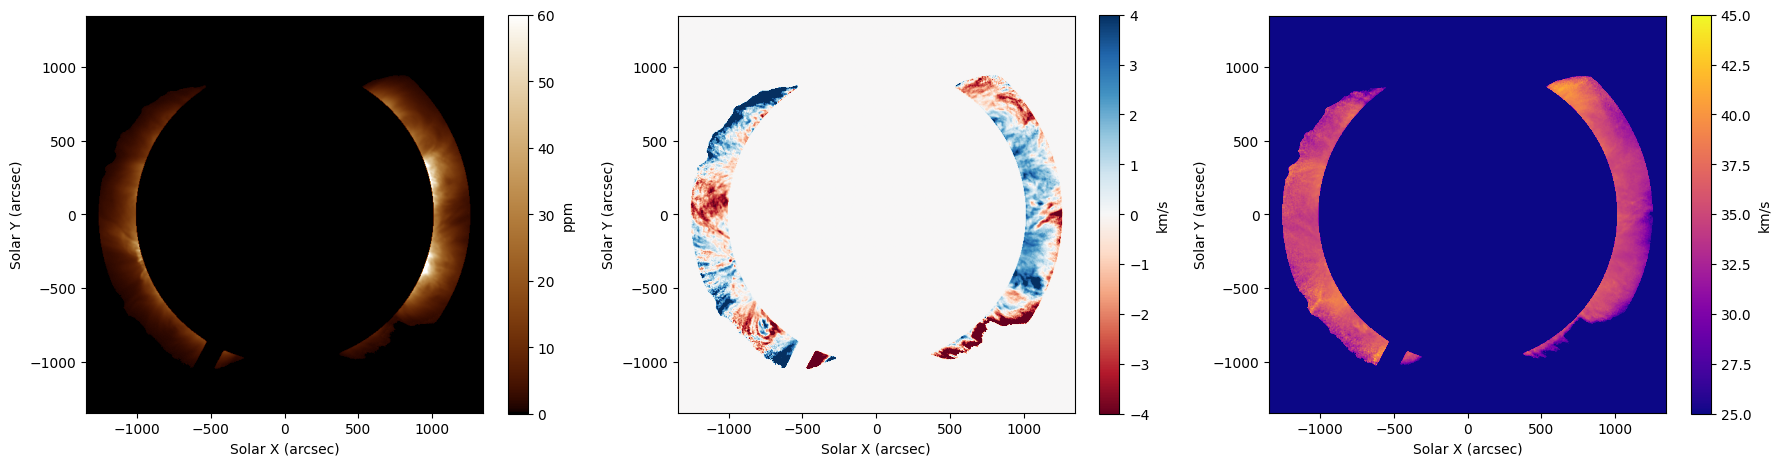

In [34]:
# Loading data cubes and displaying data products
from compPy.io.save_load import cp_load_fits
import matplotlib
import matplotlib.pyplot as plt
import sunpy.visualization.colormaps as cm

date = '20161014'
#data_cube = cp_load_fits(date)

'''
The default behaviour is to load in the intensity data only.
To load in certain data products you will need to pass in a reference to either ’i’, ’v’ or ’w’.
For example to load in Intensity, Doppler velocity and Doppler width, you can run the following:
'''

#cube_int = cp_load_fits(date, keys = ['i'])
#cube_vel = cp_load_fits(date, keys = ['v'])
#cube_wid = cp_load_fits(date, keys = ['w'])

data_i = cube_int['data']['cube_i']
data_v = cube_vel['data']['cube_v']
data_w = cube_wid['data']['cube_w']

# Plot data products
frame_num = 10

extent = get_extent()

fig, ax = plt.subplots(1,3,figsize = (18, 6))
sdoaia193 = matplotlib.colormaps['sdoaia193']

cmaps = [sdoaia193, 'RdBu', 'plasma' ]
lims = [[0,60], [-4, 4],[25,45]]
images = [data_i[frame_num], data_v[frame_num], data_w[frame_num]]
cmap_lab = ['ppm', 'km/s', 'km/s']

for cmap, axes, lim, image, c_lab in zip(cmaps, ax, lims, images, cmap_lab):
  pl = axes.imshow(image, origin = 'lower', cmap = cmap, vmax = lim[1], vmin = lim[0], extent=extent)
  plt.colorbar(pl,ax=axes, shrink=0.7, label=c_lab)
  axes.set_xlabel('Solar X (arcsec)')
  axes.set_ylabel('Solar Y (arcsec)')


plt.tight_layout()


# Dejitter data products

**Step 7**: Before we proceed for any actual analysis, we need to remove any jitter from the data files. This step is important if we want to use the CoMP data for coronal wave physics. The sub-region used for the alignment is taken from the coordinates provided in the .csv file.

The subregion is selected by hand, and usually through some trial and error. We have found that regions with high intensity contrast are most suitable.

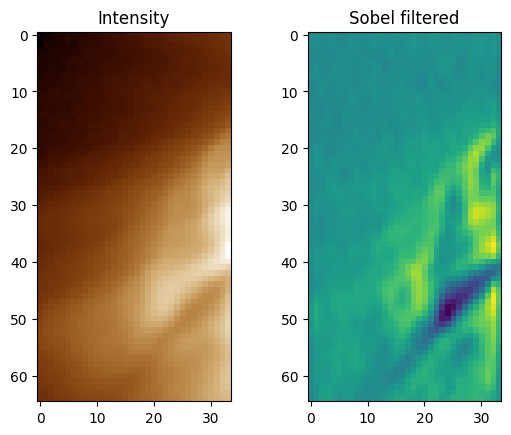

In [51]:
from scipy.ndimage import sobel

fig, ax = plt.subplots(1,2)

x1 = df['cc_coord_x1'][0]
x2 = df['cc_coord_x2'][0]
y1 = df['cc_coord_y1'][0]
y2 = df['cc_coord_y2'][0]

ax[0].imshow(data_i[0,y1:y2, x1:x2], cmap=sdoaia193)
ax[0].set_title('Intensity')
ax[1].imshow(sobel(data_i[0,y1:y2, x1:x2]))
_ = ax[1].set_title('Sobel filtered')

In [ ]:
# Align the data for further analysis
from compPy.util.util import find_files
from compPy.align import dejitter
fits_path = '/content/CoMP/wave_tracking_output/20161014/processed_data/'
files = find_files('*.fits', fits_path)
cubes_align = dejitter(files, date)

Searching /content/CoMP/wave_tracking_output/20161014/processed_data// for *.fits
Loading data from fits files.
Searching /content/CoMP/wave_tracking_output/20161014/processed_data/ for *.fits
Starting alignment - may take a little while
Max number of iterations reached. Try using another region for alignment
Maximum CC value 2.1400

RMS CC value - x,y 0.6180 0.9124

Shifting cubes


# Estimate wave angles

 **Step 8**: At this stage, we have a co-aligned dataset that we can use for the wave analysis. Now, we can estimate the propagation angles of the Alfvenic wave packets which should be along the plane of sky projection of the coronal magnetic field. The default setting (which is relatively quick) uses the perpendicular offsets method.

 However, if the "full_mode" is set to 'True', then it also returns coherence estimates as well, but will take much longer time for the analysis. For this, an additional package called `JAX` is required.

In [55]:
# Will take around 5 minutes to run

# Estimate the propagation angles of the Alfvenic waves
from compPy.io.save_load import cp_load_fits
from compPy.compute_waveang import compute_waveang
cube_v = cp_load_fits(date, keys = ['v'])
data_v = cube_v['data']['cube_v']
head_v = cube_v['primary_header'][0]
waveangle = compute_waveang(data_v, date, full_mode = False)

Searching /content/CoMP/wave_tracking_output/20161014/processed_data/ for *.fits
Starting processing....


We can plot the estimated wave propagation angles to see how they look. Note that these angles are relative to the solar plane (north-south).

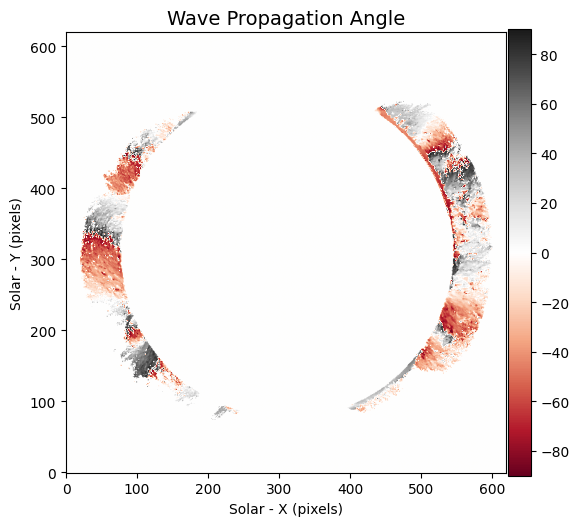

In [56]:
# Load the estimated wave angles and plot
from compPy.io.save_load import cp_load_angles
import matplotlib.pyplot as plt

wave_ang = cp_load_angles(date)
wave_ang.shape

# Plot the wave angle map
plt.figure(figsize = (6, 6))
plt.imshow(wave_ang[0, :, :], origin = 'lower', vmax = 90, vmin = -90, cmap = plt.get_cmap('RdGy'))
plt.colorbar(fraction = 0.048, pad = 0.005)
plt.xlabel('Solar - X (pixels)'), plt.ylabel('Solar - Y (pixels)')
plt.title('Wave Propagation Angle', fontsize = 14)
plt.show()

# Estimate phase speeds

**Step 9**: Also, we can estimate the propagation speeds of the Alfvenic wave packets in the corona using time-distance diagrams.

**Note that this feature is still under testing and not recommened for science use just yet. We have found some discrepencies between the IDL and Python implementations of the phase speed estimates that we are working to fix.**

This can be performed over the full field of view, but also for a subregion. We use a subregion here for brevity.

In [62]:
# Takes around 4 minutes for cell to complete

# Estimate the phase speeds of the waves
from compPy.space_time_run import space_time_run

head = cube['primary_header'][0]
cut_out = [200, 400, 0, 100] # pixel values

res = space_time_run(data_v, head, date, cut_out=cut_out, filter_cubes = False)

Pre-filtering data
Starting processing...


Here, we can load the estimated phase speeds to see its distribution. These estimated speeds can further be used to estimate the plane of sky component of the coronal magnetic field using solar magnetoseismology technique.

In [63]:
# Load the phase speed estimates
from compPy.io.save_load import cp_load_speeds
wave_speed = cp_load_speeds(date)
speed = wave_speed['prograde']
speed.shape

(240, 140)

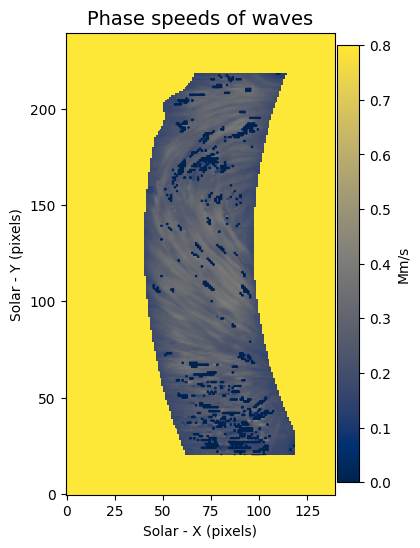

In [65]:
# Plot the phase speeds
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 6))
plt.imshow(speed, origin = 'lower', vmin = 0, vmax = 0.8, cmap = plt.get_cmap('cividis'))
plt.colorbar(fraction = 0.047, pad = 0.005, label='Mm/s')
plt.xlabel('Solar - X (pixels)'), plt.ylabel('Solar - Y (pixels)')
plt.title('Phase speeds of waves', fontsize = 14)
plt.show()